In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#1. Data Exploration and Preprocessing


In [2]:
data = pd.read_csv(r"C:\Users\Saikiran\python1\company tasks\imagoai\MLE-Assignment.csv")

In [3]:
data.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [4]:
data.sample(5)  # randomly 5 rows

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
227,imagoai_corn_227,0.436554,0.438049,0.423837,0.401467,0.389185,0.371117,0.385427,0.366541,0.367708,...,0.703079,0.691259,0.719924,0.697663,0.690273,0.703303,0.693760,0.691129,0.702042,300.0
395,imagoai_corn_395,0.493367,0.504286,0.485930,0.471946,0.478705,0.473456,0.466760,0.470290,0.447366,...,0.791491,0.790374,0.814201,0.807443,0.811985,0.783479,0.797435,0.788128,0.814911,0.0
424,imagoai_corn_424,0.502493,0.505571,0.463683,0.459179,0.465458,0.448924,0.442418,0.428286,0.441019,...,0.744474,0.761201,0.776980,0.772343,0.772171,0.764440,0.769027,0.764892,0.757240,560.0
65,imagoai_corn_65,0.445674,0.430199,0.412933,0.434519,0.404757,0.406997,0.391734,0.391914,0.390035,...,0.710967,0.718889,0.718674,0.738733,0.711178,0.722001,0.701725,0.707965,0.714362,12800.0
55,imagoai_corn_55,0.491797,0.472859,0.472092,0.482384,0.459430,0.444866,0.444314,0.417163,0.423487,...,0.750250,0.761570,0.744305,0.732833,0.735272,0.755337,0.739086,0.718858,0.749442,340.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [6]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


In [7]:
# Convert relevant columns to numerical data type
for column in data.select_dtypes(include=['object']).columns:
    if column == 'hsi_id':
        continue
    try:
        data[column] = pd.to_numeric(data[column])
    except ValueError:
        print(f"Could not convert column '{column}' to numeric - it likely contains non-numeric values.")

numerical_cols = data.select_dtypes(include=np.number).columns.difference(['hsi_id'])

Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = data[~((data[numerical_cols] < lower_bound) | (data[numerical_cols] > upper_bound)).any(axis=1)]

print("Remaining samples after outlier removal:", df_filtered.shape[0])


Remaining samples after outlier removal: 388


In [8]:
print(data.isnull().sum().sum(), " missing values found.")

0  missing values found.


In [9]:

numerical_cols = data.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy="mean")


data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

In [10]:
data

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,...,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839,1200.0
496,imagoai_corn_496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,...,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733,0.0
497,imagoai_corn_497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,...,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187,0.0
498,imagoai_corn_498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,...,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383,0.0


In [11]:
# Separate features (spectral bands) and target
X = data.drop(columns=["vomitoxin_ppb","hsi_id"])
y = data["vomitoxin_ppb"]

In [12]:
# Normalize spectral reflectance data USING standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_scaled

array([[-0.60295878, -0.96575088, -0.54309276, ..., -0.49905519,
        -0.73814026, -0.61907074],
       [-0.61156195, -0.83133055, -0.68354721, ..., -0.76682669,
        -0.75912491, -0.90419241],
       [-1.21086777, -1.52953722, -1.32806143, ..., -1.47059948,
        -1.23164663, -1.34439287],
       ...,
       [ 0.97166131,  1.33285566,  1.45154021, ...,  0.59332346,
         0.47567458,  1.08932742],
       [ 0.48074892,  1.27677133,  1.20877841, ...,  0.28256342,
         0.22226682,  0.33706454],
       [ 0.39670518,  0.37152908,  0.01788978, ..., -0.56871384,
        -0.15005123, -0.3575413 ]])

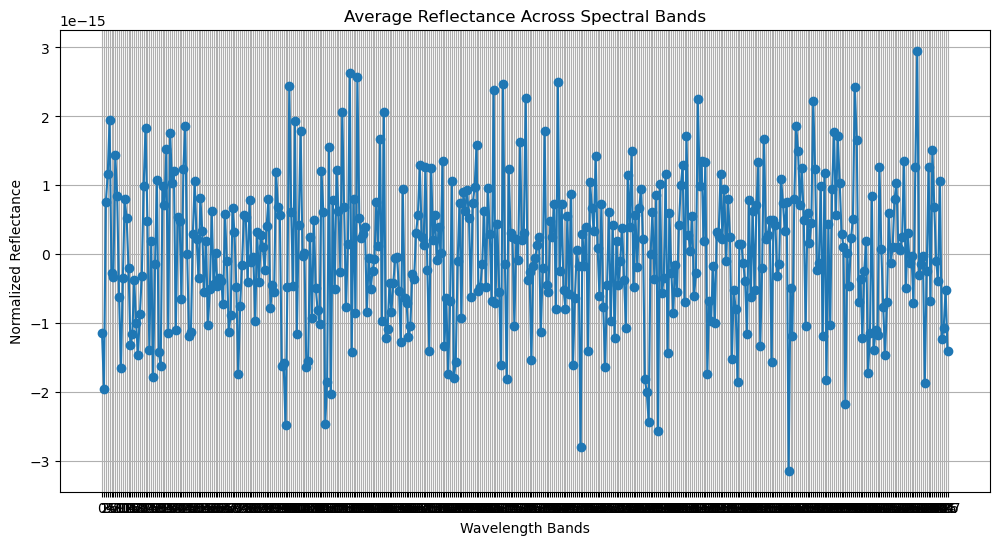

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(X.columns, X_scaled.mean(axis=0), marker="o", linestyle="-")
plt.xlabel("Wavelength Bands")
plt.ylabel("Normalized Reflectance")
plt.title("Average Reflectance Across Spectral Bands")
plt.grid()
plt.show()


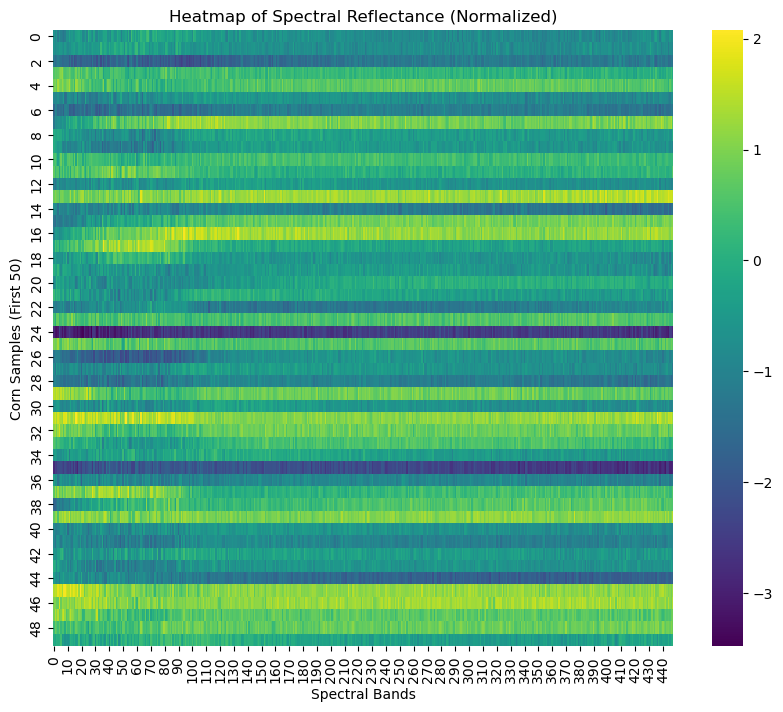

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_scaled[:50, :], cmap="viridis", xticklabels=10, cbar=True)
plt.xlabel("Spectral Bands")
plt.ylabel("Corn Samples (First 50)")
plt.title("Heatmap of Spectral Reflectance (Normalized)")
plt.show()


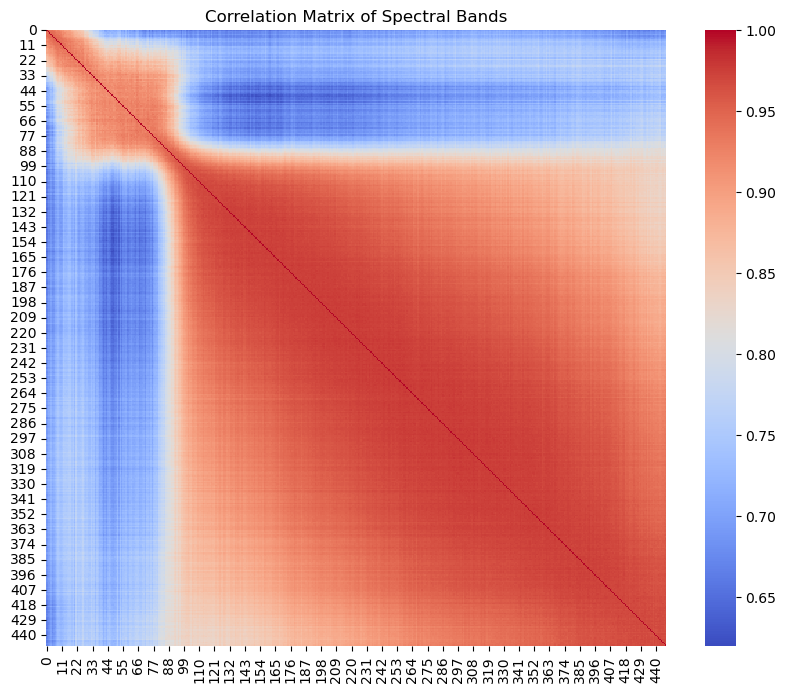

In [16]:
plt.figure(figsize=(10, 8))
# Calculate the correlation matrix using pandas DataFrame
correlation_matrix = pd.DataFrame(X_scaled).corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix of Spectral Bands")
plt.show()

#2. Dimensionality Reduction


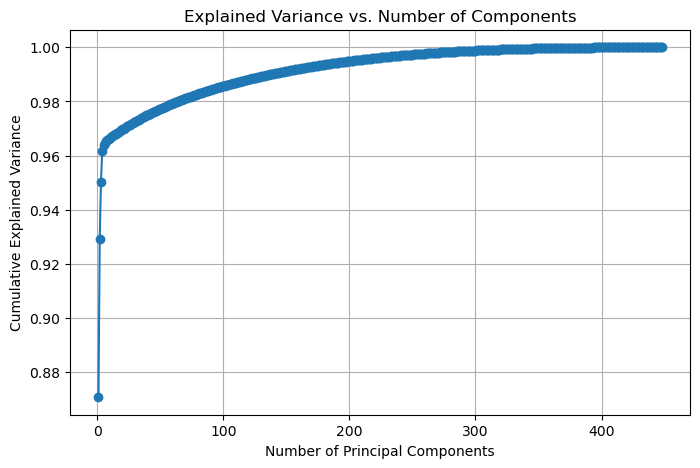

In [17]:
from sklearn.decomposition import PCA
import numpy as np


pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = np.cumsum(pca.explained_variance_ratio_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid()
plt.show()


In [18]:
# Select enough components to explain 95% variance
optimal_components = np.argmax(explained_variance >= 0.95) + 1

# Apply PCA with optimal components
pca = PCA(n_components=optimal_components)
X_pca_reduced = pca.fit_transform(X_scaled)

print(f"Reduced dimensions: {X_pca_reduced.shape[1]} (explaining 95% variance)")


Reduced dimensions: 3 (explaining 95% variance)


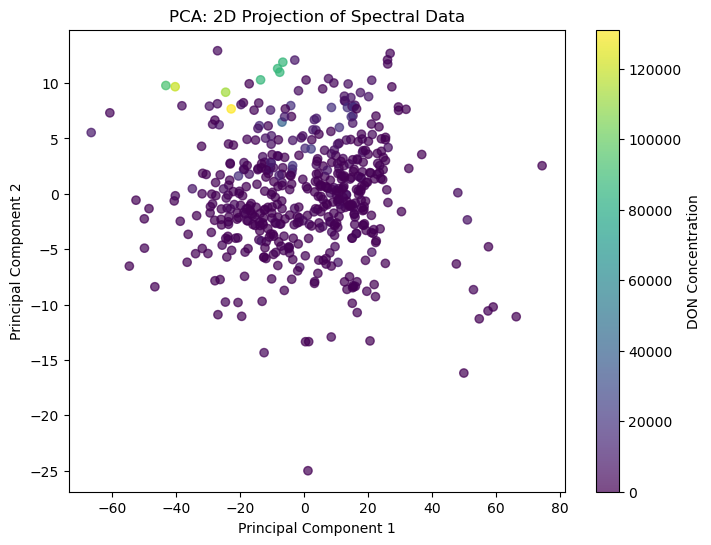

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=y, cmap="viridis", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="DON Concentration")
plt.title("PCA: 2D Projection of Spectral Data")
plt.show()


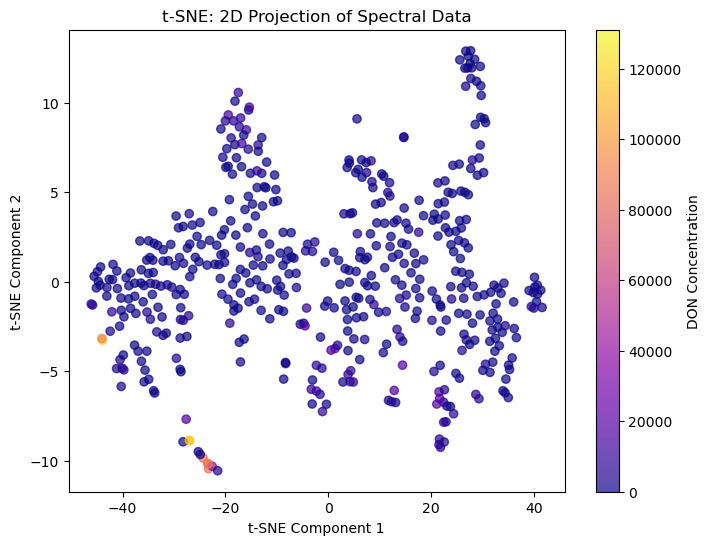

In [20]:
from sklearn.manifold import TSNE

# Reduce to 2D space
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="plasma", alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="DON Concentration")
plt.title("t-SNE: 2D Projection of Spectral Data")
plt.show()


PCA Analysis shows how many components are needed to explain variance. 3 compenents expain 95% variance

t-SNE Visualization helps check clustering patterns in hyperspectral data

#3. Model Training


Since we are dealing with hyperspectral imaging data, a CNN (Convolutional Neural Network) would be a great choice!

In [21]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input for CNN
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]


In [22]:
# Define CNN model
model = keras.Sequential([
    layers.Conv1D(filters=32, kernel_size=3, activation="relu", input_shape=(X_train.shape[1], 1)),
    layers.Conv1D(filters=64, kernel_size=3, activation="relu"),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)
])

# Compile model
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Model summary
model.summary()


C:\Users\Saikiran\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 446, 32)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 444, 64)             │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 222, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14208)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,818,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,833,409 (6.99 MB)

 Trainable params: 1,833,409 (6.99 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Train model with validation split
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 98845848.0000 - mae: 2740.4590 - val_loss: 297586656.0000 - val_mae: 4329.6362
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 140963008.0000 - mae: 2744.6228 - val_loss: 291116128.0000 - val_mae: 4375.5176
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 253243360.0000 - mae: 4012.5361 - val_loss: 279287200.0000 - val_mae: 5146.4526
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 156974448.0000 - mae: 3863.4160 - val_loss: 271415264.0000 - val_mae: 5409.5015
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 102800344.0000 - mae: 3626.8745 - val_loss: 269801888.0000 - val_mae: 5180.6484
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 84165128.0000 - mae: 3137.2078 - val_loss: 263574656.0000 - val_mae: 5503.4771
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 125715288.0000 - mae: 4116.3560 - val_loss: 258537472.0000 - val_mae: 5524.7583
Epoch 8/50
13/13 ━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 54155204.0000 - mae: 2335.0386 - val_loss: 74924672.0000 - val_mae: 3014.5862
Epoch 49/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 48526300.0000 - mae: 2186.9673 - val_loss: 75583440.0000 - val_mae: 3017.8391
Epoch 50/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 53442424.0000 - mae: 2519.5789 - val_loss: 64594556.0000 - val_mae: 3040.1619


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 53024744.0000 - mae: 2710.6865
Test MAE: 3040.1619


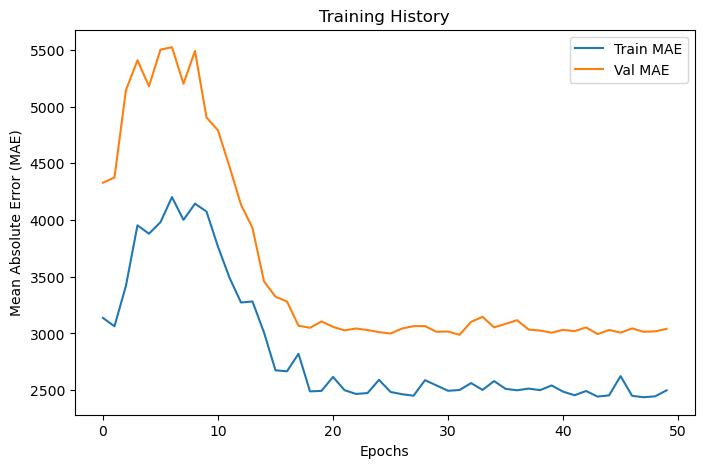

In [24]:
# Evaluate on test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.4f}")

# Plot training history
plt.figure(figsize=(8, 5))
plt.plot(history.history["mae"], label="Train MAE")
plt.plot(history.history["val_mae"], label="Val MAE")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error (MAE)")
plt.legend()
plt.title("Training History")
plt.show()


In [25]:
!pip install keras-tuner

In [26]:
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers


def build_model(hp):
    model = keras.Sequential()

    # First Conv1D Layer
    model.add(layers.Conv1D(
        filters=hp.Int('filters_1', min_value=16, max_value=64, step=16),
        kernel_size=hp.Int('kernel_size_1', min_value=3, max_value=7, step=2),
        activation="relu",
        input_shape=(X_train.shape[1], 1)
    ))

    # Second Conv1D Layer
    model.add(layers.Conv1D(
        filters=hp.Int('filters_2', min_value=32, max_value=128, step=32),
        kernel_size=hp.Int('kernel_size_2', min_value=3, max_value=7, step=2),
        activation="relu"
    ))

    # Pooling & Flattening
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Flatten())

    # Dense Layers
    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=64, max_value=256, step=64),
        activation="relu"
    ))

    model.add(layers.Dense(1))  # Regression output

    # Compile Model
    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])
        ),
        loss="mse",
        metrics=["mae"]
    )

    return model

# Hyperparameter tuning using Random Search
tuner = kt.RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=10,
    executions_per_trial=1,
    directory="hyperparam_tuning",
    project_name="cnn_don_prediction"
)

# Run the search
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best Filters (Layer 1): {best_hps.get('filters_1')}")
print(f"Best Kernel Size (Layer 1): {best_hps.get('kernel_size_1')}")
print(f"Best Filters (Layer 2): {best_hps.get('filters_2')}")
print(f"Best Kernel Size (Layer 2): {best_hps.get('kernel_size_2')}")
print(f"Best Dense Units: {best_hps.get('dense_units')}")
print(f"Best Learning Rate: {best_hps.get('learning_rate')}")


Reloading Tuner from hyperparam_tuning\cnn_don_prediction\tuner0.json
Best Filters (Layer 1): 32
Best Kernel Size (Layer 1): 3
Best Filters (Layer 2): 96
Best Kernel Size (Layer 2): 5
Best Dense Units: 64
Best Learning Rate: 0.001


#4. Model Evaluation



In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test set
y_pred =  model.predict(X_test).flatten()

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Mean Absolute Error (MAE): 3040.1620
Root Mean Squared Error (RMSE): 8037.0736
R² Score: 0.7689


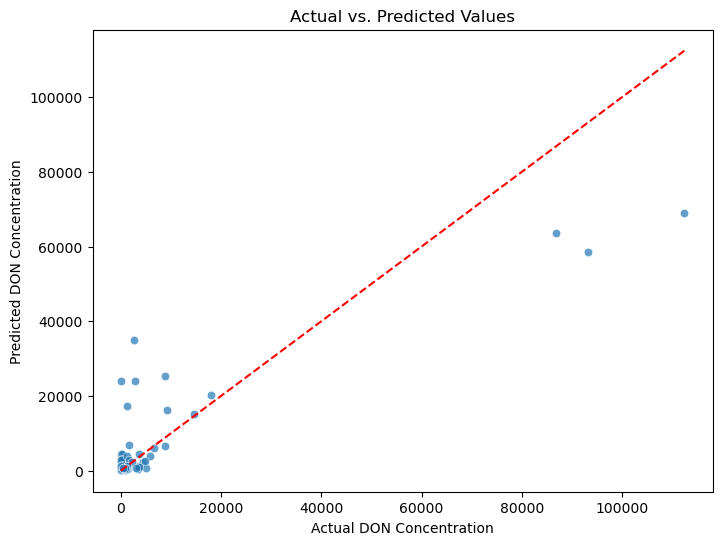

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Ideal line
plt.xlabel("Actual DON Concentration")
plt.ylabel("Predicted DON Concentration")
plt.title("Actual vs. Predicted Values")
plt.show()


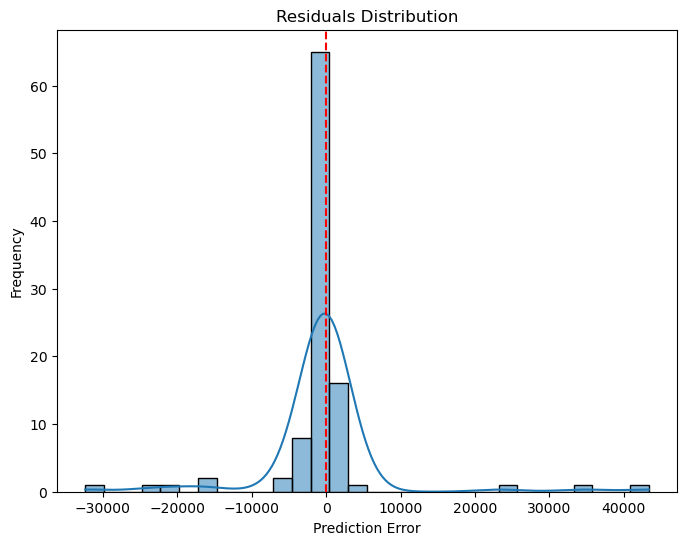

In [29]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle="--")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()


#Bonus (Optional) Transformer for Spectral Data Regression


In [30]:
!pip install torch torchvision torchaudio transformers numpy pandas scikit-learn matplotlib seaborn 


In [32]:

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, TensorDataset


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size, shuffle=False)


In [33]:
train_loader

In [41]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, Flatten, Conv1D, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load and preprocess data
def load_data(uploaded_file):
    df = pd.read_csv(uploaded_file)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    return X, y

# Define Transformer Model
def create_transformer_model(input_shape):
    inputs = Input(shape=(input_shape,))
    x = Dense(64, activation='relu')(inputs)
    attn_output = MultiHeadAttention(num_heads=8, key_dim=32)(x, x)
    x = LayerNormalization(epsilon=1e-6)(x + attn_output)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Flatten()(x)
    outputs = Dense(1, activation='linear')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# Define CNN Model
def create_cnn_model(input_shape):
    inputs = Input(shape=(input_shape, 1))
    x = Conv1D(32, kernel_size=3, activation='relu')(inputs)
    x = Conv1D(64, kernel_size=3, activation='relu')(x)
    x = GlobalAveragePooling1D()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1, activation='linear')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# Train Model
def train_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16, verbose=1)
    return model

# Evaluate Model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return y_pred, mae, rmse, r2


In [44]:
 X, y

(            0         1         2         3         4         5         6  \
 0    0.416181  0.396844  0.408985  0.372865  0.385293  0.365390  0.355226   
 1    0.415797  0.402956  0.402564  0.396014  0.397192  0.389634  0.375671   
 2    0.389023  0.371206  0.373098  0.373872  0.361056  0.349709  0.333882   
 3    0.468837  0.473255  0.462949  0.459335  0.461672  0.459824  0.458194   
 4    0.483352  0.487274  0.469153  0.487648  0.464026  0.451152  0.458229   
 ..        ...       ...       ...       ...       ...       ...       ...   
 495  0.478140  0.444033  0.442120  0.437473  0.428672  0.413238  0.417758   
 496  0.409367  0.394941  0.380236  0.375340  0.346122  0.354650  0.361170   
 497  0.486526  0.501372  0.500175  0.508139  0.489411  0.457311  0.462321   
 498  0.464595  0.498822  0.489077  0.453381  0.487636  0.461950  0.461671   
 499  0.460840  0.457656  0.434632  0.412675  0.418638  0.408338  0.403807   
 
             7         8         9  ...       438       439   

In [42]:
model

<Sequential name=sequential_2, built=True>

In [43]:
y_pred, mae, rmse, r2

(array([  431.67657,  2454.4143 ,   543.68304,   420.10443,  1250.9043 ,
         1079.068  ,   604.3686 ,  2492.079  ,   483.2825 ,   584.2557 ,
          668.4556 ,   698.50085,   485.6366 ,   576.7227 ,  1054.9298 ,
         3871.4011 ,   441.40668,   410.0783 ,   296.9901 ,  1071.2871 ,
          794.4988 ,   883.82874,  1373.7825 , 23897.016  ,   528.0796 ,
         4580.8438 ,   408.80463,   373.83502,  1449.9363 ,   399.46582,
          911.8957 ,  2247.7595 ,   675.0399 ,   685.396  ,  1033.1979 ,
          949.4541 ,   441.3299 ,  4360.575  ,   333.5955 ,   419.14032,
          639.8756 ,   414.6302 ,  3219.7634 ,  1019.6846 ,   716.8053 ,
          670.2268 ,  1168.5879 ,  6555.6206 , 15170.944  ,  4600.4634 ,
         2744.3796 ,   535.41547, 20322.852  , 69033.98   ,   258.51828,
          423.48547,  6910.7314 ,  2536.5818 ,   347.2055 ,   478.8031 ,
          511.98743,  1091.4224 , 23976.867  , 16217.499  ,  1266.4104 ,
          616.77856, 17449.594  ,   583.0917 ,   35